In [169]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [170]:
# Nombre de particules
N = 500

Q = 10 # Variance du modèle 
R = 1
# longueur de scénario
T = 50

x_init = np.random.normal()

In [171]:
# Main function pool

def f(x, n):
    return 0.5*x + 25*(x/(1+x**2)) + 8*np.cos(1.2*n)

def g(x):
    return (x**2)/20

In [172]:
# Hidden states + observations generation

def generate_hidden_states(Q, T, x_init):
    X = np.zeros(T)
    X[0] = x_init
    for i in range(0, len(X) -1):
        X[i+1] = f(X[i], i+1) + np.random.normal(0, Q)
    return X

def generate_observations(R, T, X):
    Y = np.zeros(T)
    for i in range(len(Y) -1):
        Y[i] = g(X[i]) + np.random.normal(0, R)
    return Y

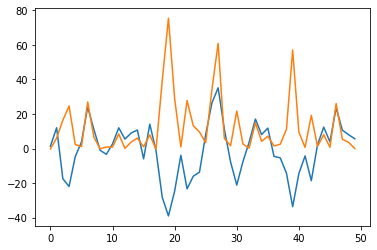

In [173]:
X_RW = generate_hidden_states(Q, T, x_init)
Y = generate_observations(R, T, X_RW)
plt.plot(X_RW)
plt.plot(Y)
plt.show()

In [174]:
def filtrage_particulaire(W, X, reech, y_n, Q, R, t):
    X = np.hstack((X, f(reech, t).reshape(-1, 1) + np.random.normal(0, Q, (N, 1)) ))
    W = np.hstack( (W, stats.norm.pdf(y_n, g(X[:, -1]).reshape(-1, 1), R)) )
    W[:, -1] = W[:, -1] / W[:, -1].sum()
    return W, X

In [175]:
# On initialise X_0 avec les n particules :
X = np.random.randn(N, 1)
W = stats.norm.pdf(Y[0], g(X[:, -1]).reshape(-1, 1), R)
W[:, -1] = W[:, -1] / W[:, -1].sum()

# On propage:
for t in range(1, T):
    A = np.random.choice(range(N), N, p=W[:, -1])
    # rééchantillonage de X
    reech = X[:,-1][A]
    W, X = filtrage_particulaire(W, X, reech, Y[t], Q, R, t)

In [176]:
# On sommes les poids pondérés pour avoir l'estimation par filtrage particulaire
filtrage = (X * W).sum(0)

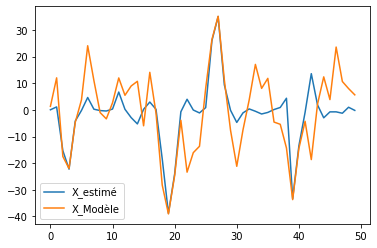

In [177]:
plt.plot(filtrage, label="X_estimé")
#plt.plot(Y, label="Y")
plt.plot(X_RW, label="X_Modèle")
plt.legend()
plt.show()
